# Initialization

In [3]:
# %load init.ipy
# NOTE: This is for when the notebook is converted to a python script
# NOTE: this MUST precede the magic functions
def get_ipython():
    return type('Dummy', (object,), dict(run_line_magic=lambda *args, **kwargs: None))
    
%reload_ext autoreload
%autoreload 2

# %load init.ipy
import os, sys, logging, datetime, warnings, shutil
from importlib import reload

import numpy as np
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from nose import tools

import corner
import tqdm
import memory_profiler as mpro

import kalepy as kale
import kalepy.utils
import kalepy.plot
from kalepy.plot import nbshow   # NOTE: this should be upgraded to `plot_control`
from kalepy.plot import plot_control

def save_fig(fig, fname, **kwargs):
    kwargs.setdefault('path', kale._PATH_NB_OUT)
    kwargs.setdefault('rename', True)
    return kale.plot.save_fig(fig, fname, **kwargs)

In [16]:
import kalepy.corner
reload(kalepy.corner)
reload(kalepy.plot)
reload(kalepy.utils)

<module 'kalepy.utils' from '/Users/lzkelley/Programs/kalepy/kalepy/utils.py'>

# Generate Random Data

In [4]:
NUM = 30000
# bandwidth = 0.2

sigma = [1.0, 0.2, 1.5]
corr = [
    [+1.0, +0.8, +0.4],
    [+0.8, +1.0, -0.5],
    [+0.2, -0.5, +1.0]
]

s2 = np.square(sigma)

cov = np.zeros_like(corr)
for (ii, jj), cc in np.ndenumerate(corr):
    cov[ii, jj] = cc * sigma[ii] * sigma[jj]

data = np.random.multivariate_normal(np.zeros_like(sigma), cov, NUM).T
dd = data[1, :]
dd = (dd - dd.min())/dd.max()
data *= np.sqrt(dd)[np.newaxis, :]

pc = 0
extr = [np.percentile(dd, [0+pc, 100-pc]) for dd in data]
noise = [np.random.uniform(*ex, NUM//5) for ex in extr]
data = np.append(data, noise, axis=1)

/Users/lzkelley/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.


# Full Corner Plot

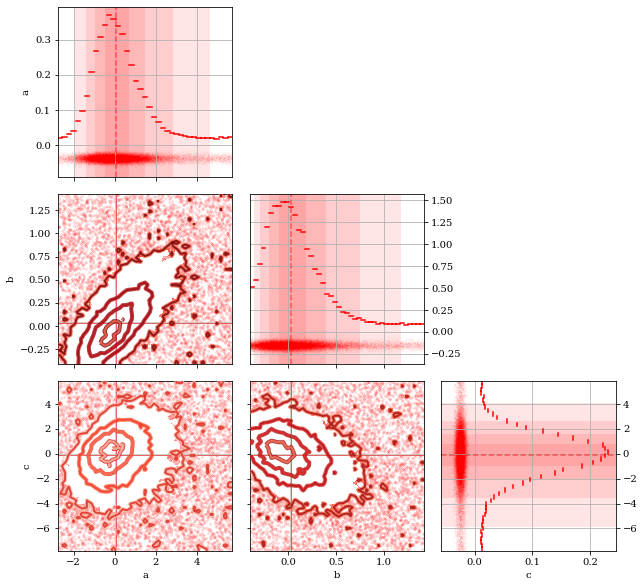

Saved to '/Users/lzkelley/Programs/kalepy/kalepy/notebooks/output/corner-test_19.png'


'/Users/lzkelley/Programs/kalepy/kalepy/notebooks/output/corner-test_19.png'

In [66]:
import kalepy.corner
reload(kalepy.corner)
reload(kalepy.plot)
reload(kalepy.utils)

labels = 'abc'
corner = kale.corner.Corner(figsize=[10, 10], data=data, labels=labels)

scatter = True
edges = [40, 45, 50]
# scatter = False
smap = dict(log=True)
hist1d = dict(joints=False)
hist2d = dict()
# hist2d = False
contour = dict(linewidths=2.0)
# contour = False

corner.data(color='r', edges=edges,
            scatter=scatter, smap=smap, hist1d=hist1d, hist2d=hist2d, contour=contour)

nbshow()
fname = 'corner-test.png'
save_fig(fig, fname)

# 1D Distributions

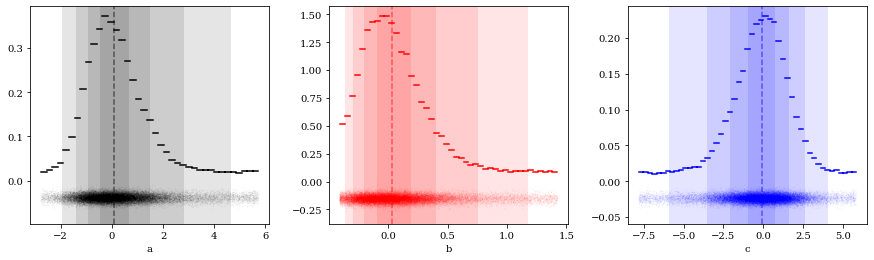

Saved to '/Users/lzkelley/Programs/kalepy/kalepy/notebooks/output/corner-test-2d_00.png'


'/Users/lzkelley/Programs/kalepy/kalepy/notebooks/output/corner-test-2d_00.png'

In [78]:
import kalepy.corner
reload(kalepy.corner)
reload(kalepy.plot)
reload(kalepy.utils)

fig, axes = plt.subplots(figsize=[15, 4], ncols=3)
plt.subplots_adjust(wspace=0.25)
colors = ['k', 'r', 'b']

for kk, ax in enumerate(axes):
    col = colors[kk]
    ax.set(xlabel=labels[kk])  
    kale.corner.dist1d_data(ax, edges[kk], data=data[kk], color=col)

nbshow()
fname = 'corner-test-2d.png'
save_fig(fig, fname)

# 2D Distributions

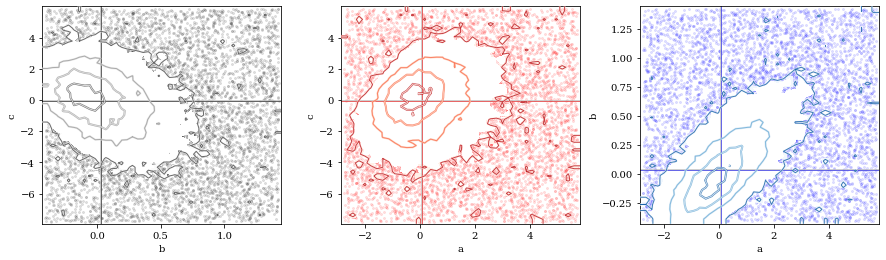

Saved to '/Users/lzkelley/Programs/kalepy/kalepy/notebooks/output/corner-test-2d.png'


'/Users/lzkelley/Programs/kalepy/kalepy/notebooks/output/corner-test-2d.png'

In [77]:
import kalepy.corner
reload(kalepy.corner)
reload(kalepy.plot)
reload(kalepy.utils)

fig, axes = plt.subplots(figsize=[15, 4], ncols=3)
plt.subplots_adjust(wspace=0.25)
colors = ['k', 'r', 'b']

for kk, ax in enumerate(axes):
    col = colors[kk]
    jj = (kk + 1) % 3
    ii = (kk + 2) % 3
    jj, ii = np.sort([jj, ii])
    te = [edges[jj], edges[ii]]
    td = [data[jj], data[ii]]
    ax.set(xlabel=labels[jj], ylabel=labels[ii])
    
    kale.corner.dist2d_data(ax, te, data=td, color=col)

nbshow()
fname = 'corner-test-2d.png'
save_fig(fig, fname)